In [133]:
import os 
import matplotlib.pyplot as plt
import numpy as np

In [265]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.svm import SVC
x = iris.data
y = iris.target

# Chọn ra 2 features để dễ vẽ hình
features = [0,1]
x = x[:,features]

In [135]:
data_3=np.loadtxt('https://github.com/huynhthanh98/ML/raw/ML-2022/lab-07/data_3.txt')
data_4=np.loadtxt('https://github.com/huynhthanh98/ML/raw/ML-2022/lab-07/data_4.txt')

In [245]:
data_3_x = data_3[:, 0:2]
data_3_y = data_3[:, -1]
data_4_x = data_4[:, 0:2]
data_4_y = data_4[:, -1]

In [251]:
def plot_data_and_boundary(x, y, clf, title=None):
    x1_min=min(x[:, 0])-1
    x1_max=max(x[:, 0])+1
    x2_min=min(x[:, 1])-1
    x2_max=max(x[:, 1])+1
    grid_spacing=0.05
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, grid_spacing), 
        np.arange(x2_min, x2_max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()] 
    y_prd = clf.predict(grid).reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_prd,  cmap=plt.cm.Pastel1)
 
    #plotting result
    k=len(np.unique(y))
    cols=['ro', 'k^', 'b*','gx'] 
    for _idx, label in enumerate(range(k)):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[_idx]) 
    
    plt.contourf(xx1, xx2, y_prd,  cmap=plt.cm.Pastel1)
    plt.title(title)
    plt.show() 

## Changing Kernel

####  -  Dataset: data_3

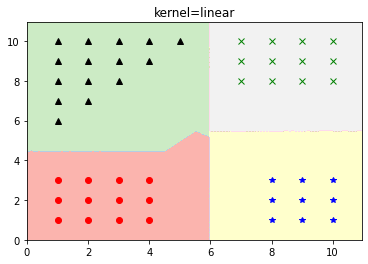

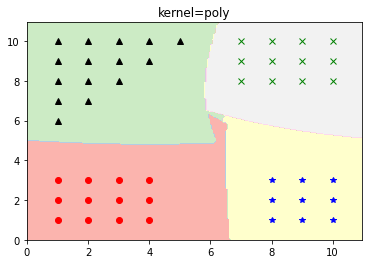

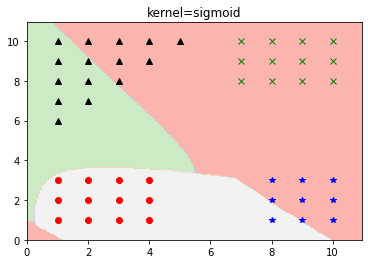

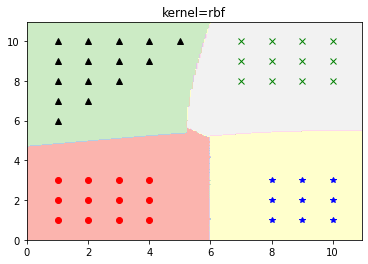

In [255]:
kernels=["linear", 'poly', 'sigmoid', 'rbf'] 
for kernel in kernels: 
    clf=SVC(C=1, kernel=kernel)
    clf.fit(data_3_x, data_3_y)
    plot_data_and_boundary(data_3_x, data_3_y, clf, title="kernel={}".format(kernel))
    

## Changing C
Ta để parameter kernel = 'rbf' 

####  -  Dataset: data_3

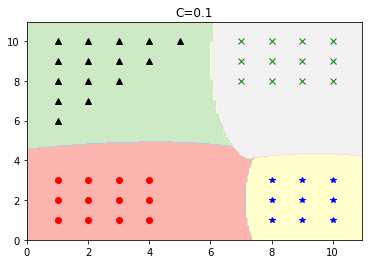

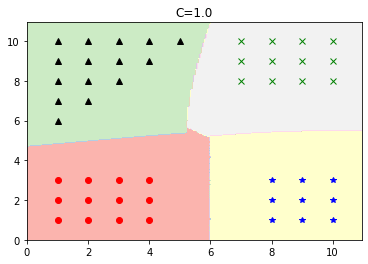

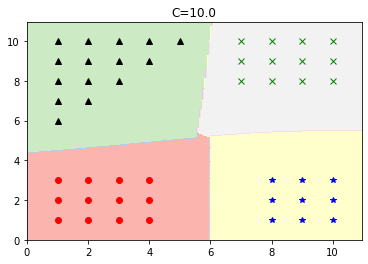

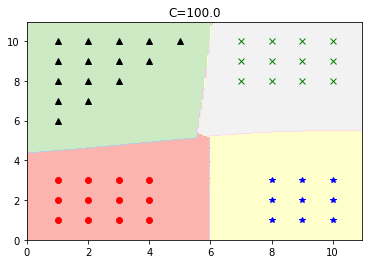

In [262]:
C=[0.1, 1.0, 10.0, 100.0]
for c in C: 
    clf=SVC(C=c, kernel="rbf")
    clf.fit(data_3_x, data_3_y)
    plot_data_and_boundary(data_3_x, data_3_y, clf, title="C={}".format(c))
    

####  -  Dataset: iris

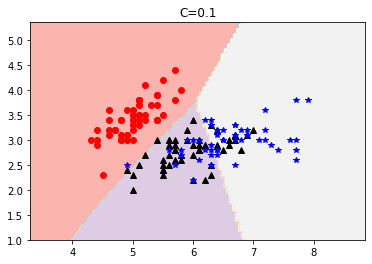

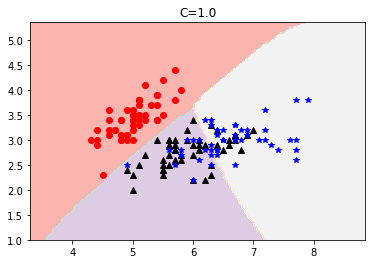

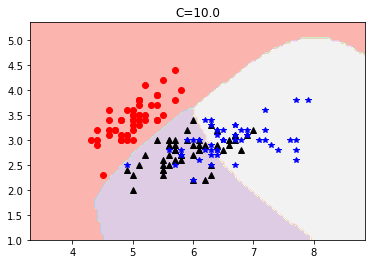

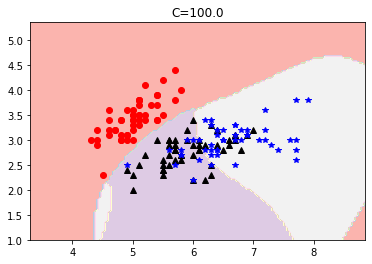

In [266]:
C=[0.1, 1.0, 10.0, 100.0]
for c in C: 
    clf=SVC(C=c, kernel="rbf")
    clf.fit(x, y)
    plot_data_and_boundary(x, y, clf, title="C={}".format(c))
    

C is penalty parameter. C represent the trade off between classification error and maximization of the decicion's margin. 
- Lower C, the boundary is more simple (linear), more points are not classify correctly. The model are easier to get underfitting.  
- Higher C, the more complex model, that try to classify more correct points. The model are easier to get overfitting.  


####  -  Dataset: data_4

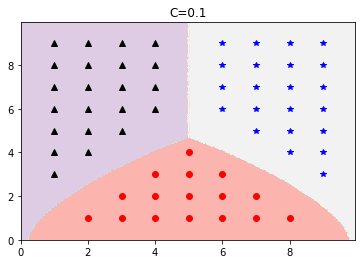

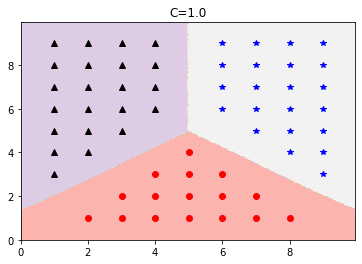

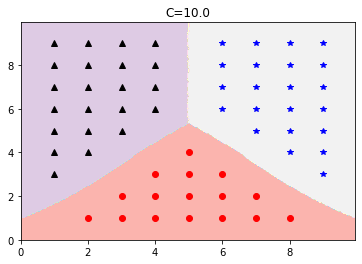

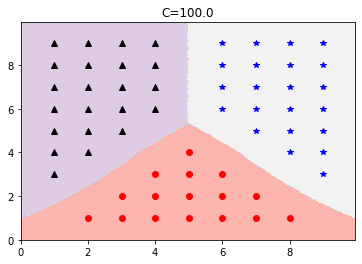

In [263]:
C=[0.1, 1.0, 10.0, 100.0]
for c in C: 
    clf=SVC(C=c, kernel="rbf")
    clf.fit(data_4_x, data_4_y)
    plot_data_and_boundary(data_4_x, data_4_y, clf, title="C={}".format(c))
    

## Changing gamma

### Dataset: data_3

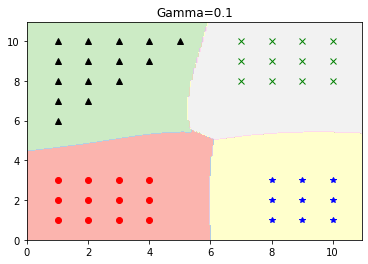

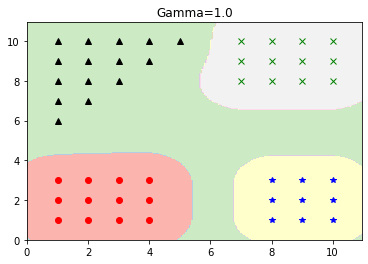

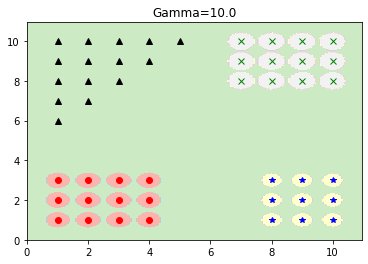

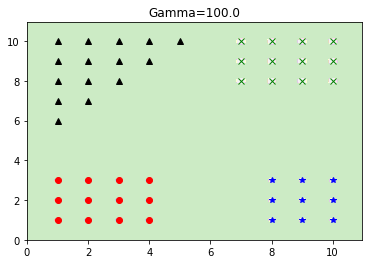

In [264]:
gammas=[0.1, 1.0, 10.0, 100.0]
for gamma in gammas: 
    clf=SVC(C=1,gamma=gamma, kernel="rbf")
    clf.fit(data_3_x, data_3_y)
    plot_data_and_boundary(data_3_x, data_3_y, clf, title="Gamma={}".format(gamma))
     

### Dataset: iris

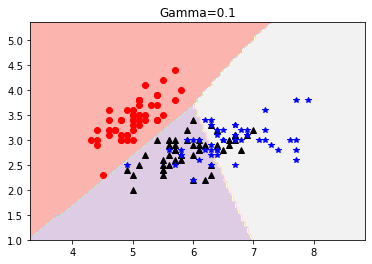

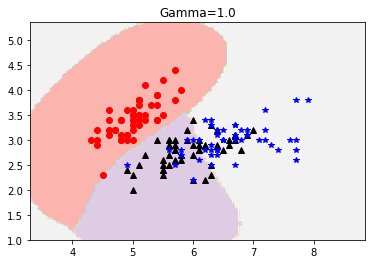

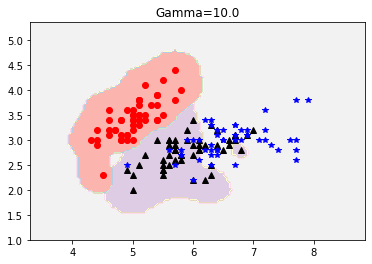

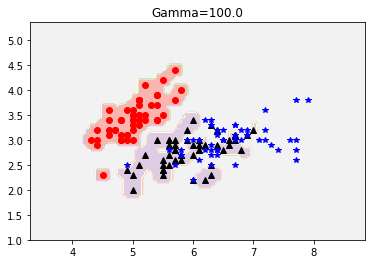

In [267]:
gammas=[0.1, 1.0, 10.0, 100.0]
for gamma in gammas: 
    clf=SVC(C=1, kernel="rbf", gamma=gamma)
    clf.fit(x, y)
    plot_data_and_boundary(x, y, clf, title="Gamma={}".format(gamma))
    

Gamma parameter define how far the influence single training example on the model, low gamma mean "far" value and high values mean "close": 
- When gamma is small: model is more simple, only points very near the boundary have high influence. The model are easier to get underfitting. 
- When gamma is large: model is more complex, points far from the decicion also have influence on the shape of the boundary. The model are easier to get overfitting. 
